### Importación de datos



In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
# Creamos una nueva columna "Valor Final" para cada tienda
tienda["Valor Final"] = tienda["Precio"] + tienda["Costo de envío"]
tienda2["Valor Final"] = tienda2["Precio"] + tienda2["Costo de envío"]
tienda3["Valor Final"] = tienda3["Precio"] + tienda3["Costo de envío"]
tienda4["Valor Final"] = tienda4["Precio"] + tienda4["Costo de envío"]

# Sumamos la facturación de cada tienda
facturacion = {
    "Tienda 1": tienda["Valor Final"].sum(),
    "Tienda 2": tienda2["Valor Final"].sum(),
    "Tienda 3": tienda3["Valor Final"].sum(),
    "Tienda 4": tienda4["Valor Final"].sum()
}

# Mostramos los resultados ordenados
facturacion_total = pd.Series(facturacion).sort_values(ascending=False)
print("Facturación total por tienda:")
# Formateamos los números para mostrarlos con comas y sin notación científica
for tienda, valor in facturacion_total.items():
    print(f"{tienda}: ${valor:,.2f}")



Facturación total por tienda:
Tienda 1: $1,212,258,300.00
Tienda 2: $1,175,828,600.00
Tienda 3: $1,156,536,200.00
Tienda 4: $1,093,693,100.00


# 2. Ventas por categoría

In [10]:
# Función corregida
def ventas_por_categoria(df, nombre_tienda):
    print(f"\nCategorías más vendidas - {nombre_tienda}")
    print(df["Categoría del Producto"].value_counts().head(3))

# Aplicamos la función a cada tienda
ventas_por_categoria(tienda, "Tienda 1")
ventas_por_categoria(tienda2, "Tienda 2")
ventas_por_categoria(tienda3, "Tienda 3")
ventas_por_categoria(tienda4, "Tienda 4")



Categorías más vendidas - Tienda 1
Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324
Name: count, dtype: int64

Categorías más vendidas - Tienda 2
Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313
Name: count, dtype: int64

Categorías más vendidas - Tienda 3
Categoría del Producto
Muebles         499
Electrónicos    451
Juguetes        315
Name: count, dtype: int64

Categorías más vendidas - Tienda 4
Categoría del Producto
Muebles         480
Electrónicos    451
Juguetes        338
Name: count, dtype: int64


# 3. Calificación promedio de la tienda


In [11]:
# Función para mostrar el promedio de calificación por tienda
def promedio_calificacion(df, nombre_tienda):
    promedio = df["Calificación"].mean()
    print(f"{nombre_tienda}: {promedio:.2f}")

print("\nPromedio de evaluación por tienda:")
promedio_calificacion(tienda, "Tienda 1")
promedio_calificacion(tienda2, "Tienda 2")
promedio_calificacion(tienda3, "Tienda 3")
promedio_calificacion(tienda4, "Tienda 4")



Promedio de evaluación por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [12]:
# Función para mostrar el producto más y menos vendido en una tienda
def extremos_de_ventas(df, nombre_tienda):
    print(f"\n{nombre_tienda} - Productos más y menos vendidos:")
    mas_vendido = df["Producto"].value_counts().idxmax()
    menos_vendido = df["Producto"].value_counts().idxmin()
    print(f"Más vendido: {mas_vendido}")
    print(f"Menos vendido: {menos_vendido}")

# Aplicamos la función a cada tienda
extremos_de_ventas(tienda, "Tienda 1")
extremos_de_ventas(tienda2, "Tienda 2")
extremos_de_ventas(tienda3, "Tienda 3")
extremos_de_ventas(tienda4, "Tienda 4")



Tienda 1 - Productos más y menos vendidos:
Más vendido: Microondas
Menos vendido: Auriculares con micrófono

Tienda 2 - Productos más y menos vendidos:
Más vendido: Iniciando en programación
Menos vendido: Juego de mesa

Tienda 3 - Productos más y menos vendidos:
Más vendido: Kit de bancas
Menos vendido: Bloques de construcción

Tienda 4 - Productos más y menos vendidos:
Más vendido: Cama box
Menos vendido: Guitarra eléctrica


# 5. Envío promedio por tienda

In [13]:
# Función para mostrar el costo promedio de envío por tienda
def promedio_envio(df, nombre_tienda):
    promedio = df["Costo de envío"].mean()
    print(f"{nombre_tienda}: ${promedio:.2f}")

print("\nCosto promedio de envío por tienda:")
promedio_envio(tienda, "Tienda 1")
promedio_envio(tienda2, "Tienda 2")
promedio_envio(tienda3, "Tienda 3")
promedio_envio(tienda4, "Tienda 4")



Costo promedio de envío por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


**6. VISUALIZACION DE DATOS**

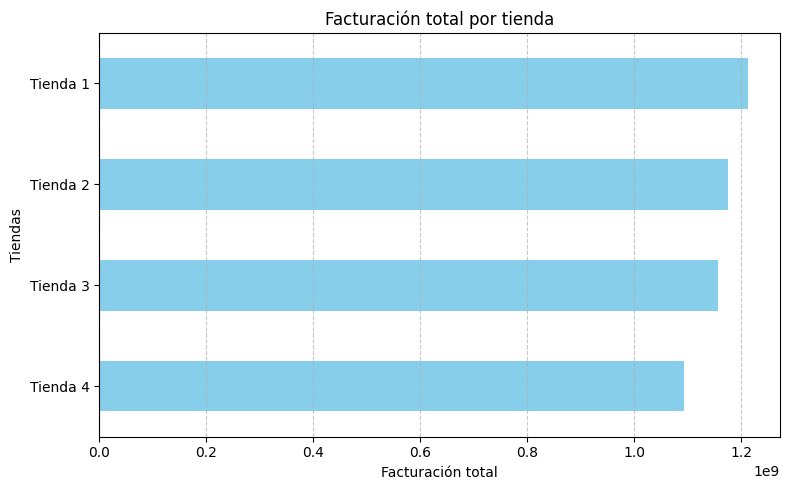

In [15]:
import matplotlib.pyplot as plt

# Datos de facturación que ya calculaste
facturacion_total.plot(kind='barh', color='skyblue', figsize=(8, 5))
plt.xlabel('Facturación total')
plt.ylabel('Tiendas')
plt.title('Facturación total por tienda')
plt.gca().invert_yaxis()  # Opcional: invierte el orden para que la tienda con más ventas aparezca arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


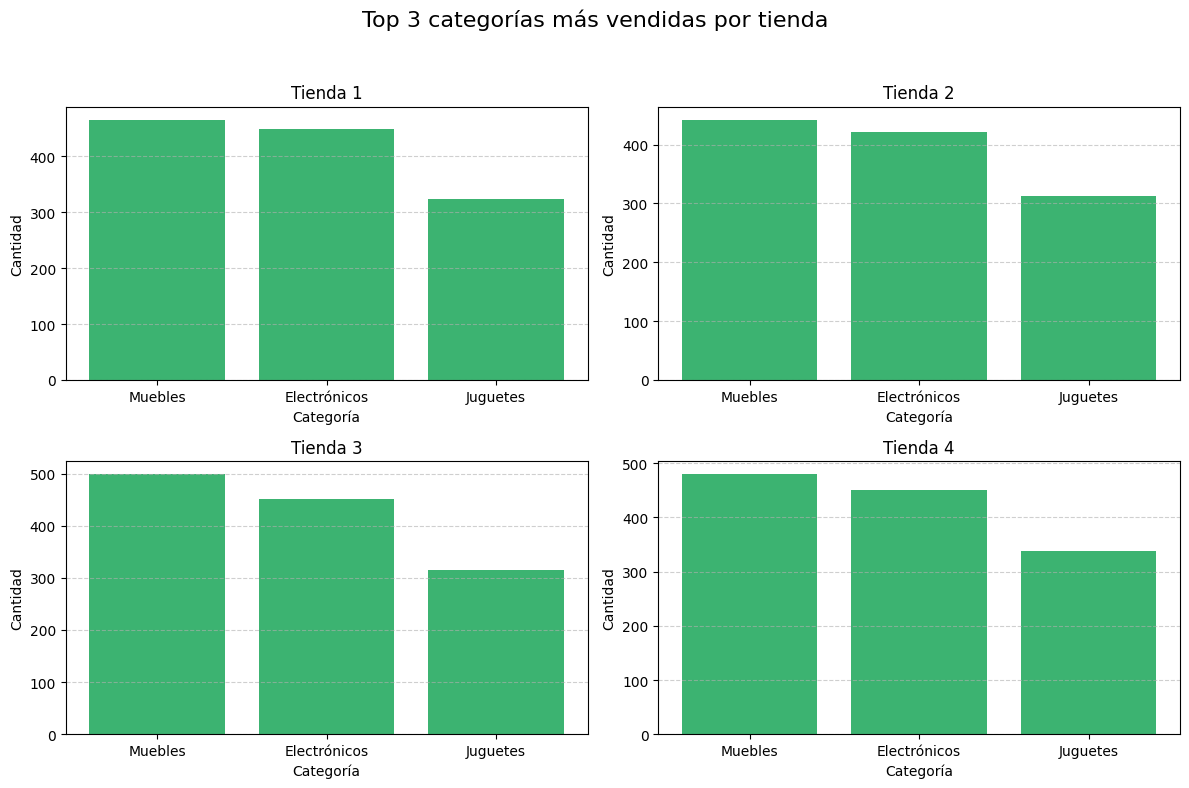

In [16]:
import matplotlib.pyplot as plt

# Creamos una figura con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Top 3 categorías más vendidas por tienda', fontsize=16)

# Diccionario de tiendas
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Lista de ejes planos para recorrer
axes = axs.flatten()

# Generamos gráfico por tienda
for i, (nombre, df) in enumerate(tiendas.items()):
    top_categorias = df["Categoría del Producto"].value_counts().head(3)
    axes[i].bar(top_categorias.index, top_categorias.values, color='mediumseagreen')
    axes[i].set_title(nombre)
    axes[i].set_ylabel('Cantidad')
    axes[i].set_xlabel('Categoría')
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título principal
plt.show()


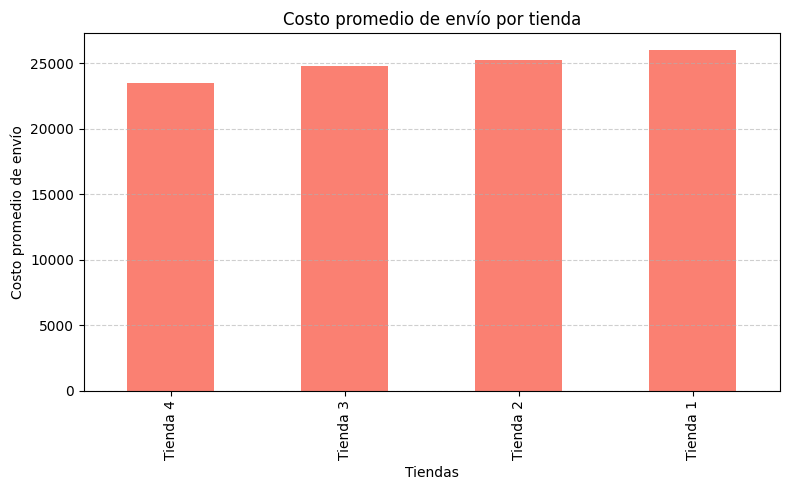

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Creamos un diccionario con los promedios de envío ya calculados
promedios_envio = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

# Lo convertimos a una serie de pandas y ordenamos
promedios_envio_series = pd.Series(promedios_envio).sort_values()

# Generamos el gráfico
promedios_envio_series.plot(kind='bar', color='salmon', figsize=(8,5))
plt.ylabel('Costo promedio de envío')
plt.xlabel('Tiendas')
plt.title('Costo promedio de envío por tienda')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


7. **CIERRE DEL PROYECTO**

# 📄 Informe Final – Análisis de Tiendas Alura Store LATAM

Después de analizar los datos de ventas de las cuatro tiendas, se presenta a continuación un resumen de los hallazgos más importantes que permitirán al Sr. Juan tomar una decisión estratégica sobre cuál tienda debería vender.

---

## 💰 Ingresos Totales por Tienda

- Tienda 1: $1,212,258,300.00  
- Tienda 2: $1,175,828,600.00  
- Tienda 3: $1,156,536,200.00  
- **Tienda 4: $1,093,693,100.00** (la más baja)

La **Tienda 4** genera la menor facturación total, siendo un indicador importante para evaluar su rendimiento.

---

## 📦 Categorías de Productos Más Vendidas

En todas las tiendas, las categorías más vendidas son:

1. **Muebles**
2. **Electrónicos**
3. **Juguetes**

Esto muestra un patrón de consumo común, aunque los volúmenes de venta varían por tienda.

---

## ⭐ Calificaciones Promedio por Tienda

- Tienda 1: 3.98  
- Tienda 2: 4.04  
- Tienda 3: 4.05  
- Tienda 4: 4.00

Todas las tiendas tienen evaluaciones bastante buenas. La Tienda 3 tiene el promedio más alto, y la Tienda 1 el más bajo.

---

## 🧸 Productos Más y Menos Vendidos

Cada tienda tiene productos con alta y baja rotación. Esto podría explorarse más para optimizar el inventario, pero en este análisis general no se identifican diferencias críticas que afecten la decisión.

---

## 🚚 Costo Promedio de Envío

- Tienda 1: $26,018.61  
- Tienda 2: $25,216.24  
- Tienda 3: $24,805.68  
- **Tienda 4: $23,459.46** (el más bajo)

Aunque la Tienda 4 tiene el **menor costo de envío**, esto no compensa su bajo nivel de facturación.

---

## ✅ Conclusión

Se recomienda vender la **Tienda 4**, ya que:

- Es la tienda con **menor facturación total**.
- Aunque tiene costos de envío bajos y calificaciones aceptables, **no logra generar ingresos competitivos** con respecto a las demás.
- Vender esta tienda permitirá reinvertir los recursos en una alternativa con mayor potencial de rendimiento.

---

_Informe generado como parte del desafío de análisis de datos – Alura LATAM._
